  Gender  Age  TimeSpent  Recommendation
0      M   25         60               1
1      F   32         90               1
2      M   28         45               0
3      F   22         75               0
4      M   35        120               1
(104, 4)

 Visualize Data Patterns Before Modeling


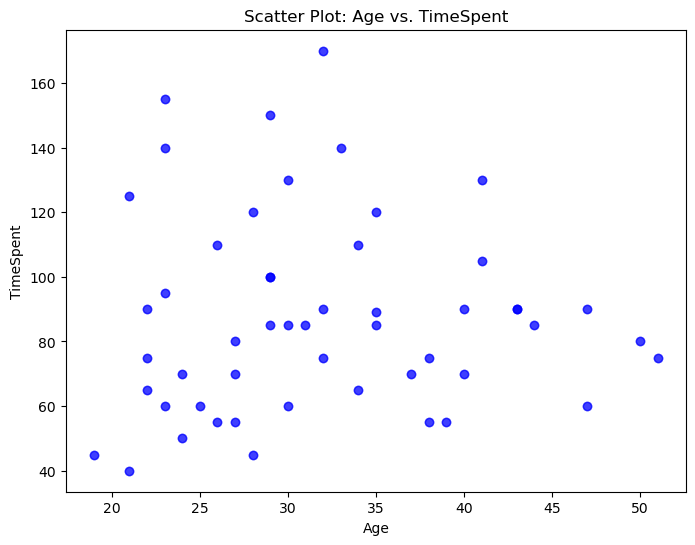


 DATA ENCODING
    Gender  Age  TimeSpent  Recommendation  Gender_encoded
0        M   25         60               1               1
1        F   32         90               1               0
2        M   28         45               0               1
3        F   22         75               0               0
4        M   35        120               1               1
..     ...  ...        ...             ...             ...
99       M   23        140               0               1
100      M   27         70               1               1
101      F   43         90               0               0
102      F   30         85               1               0
103      F   26        110               0               0

[104 rows x 5 columns]

 PERFORMANCE EVALUATIONS
              precision    recall  f1-score   support

           0       0.44      0.50      0.47         8
           1       0.67      0.62      0.64        13

    accuracy                           0.57        21
   macro

/Users/joesemienjr/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



 Watch Recommended Content =  [0]

 Please press Enter-key to continue or enter 'q' to Quit: q


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

label_encoder = LabelEncoder()

class NetflixLearningAgentkNN:
    
    def load_data(self, file_path):
        df = pd.read_csv(file_path)
        self.df = df
        print(df.head())
        print(df.shape)
        
    def visualizeData_bef_modeling(self):   
        print('\n Visualize Data Patterns Before Modeling')
        df = self.df
        
        x = df['Age']
        y = df['TimeSpent']
        
        # Create a scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, color='blue', alpha=0.5)
        plt.xlabel('Age')
        plt.ylabel('TimeSpent')
        plt.title('Scatter Plot: Age vs. TimeSpent')
        plt.show()
        
    def data_preprocessing(self):
        df = self.df
        
        df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
        
        print('\n DATA ENCODING')
        print(df)
        
        features = df[['Gender_encoded', 'Age', 'TimeSpent']]
        label = df['Recommendation']  
        
        X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
        
        self.df = df
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        
    def train_agent_predict_test(self):   
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        
        kNN_learner = KNeighborsClassifier(n_neighbors=5)
        kNN_learner.fit(X_train, y_train)
        
        self.pred = kNN_learner.predict(X_test)
        self.kNN_learner = kNN_learner
        
    def evaluate_KNN_agent(self):     
        print('\n PERFORMANCE EVALUATIONS')
        print(classification_report(self.y_test, self.pred))
        
        print("Accuracy Score = ",  accuracy_score(self.y_test, self.pred))
        
        print('\n', confusion_matrix(self.y_test, self.pred))
      
    def predict_new_percept(self, gender, age, timespent):
        genderList = [gender]
        
        gender_encoded = label_encoder.transform([gender]) 
        
        new_pred = self.kNN_learner.predict([[gender_encoded[0], age, timespent]])
        
    
        
        print('\n Watch Recommended Content = ', new_pred)
            
# Class Driver
agent = NetflixLearningAgentkNN()
                                             
file_path = 'netflix_stastics1 - Sheet1.csv'  
                                             
agent.load_data(file_path)
                                             
agent.visualizeData_bef_modeling()
                                             
agent.data_preprocessing()
                                             
agent.train_agent_predict_test()
                                             
agent.evaluate_KNN_agent()

# Agent designed as semi-autonomous with prompts or files

print('\n PREDICT NEW INSTANCES')
while True:  
    gender = str(input("Enter gender(M, F): "))
    age = int(input("Enter age: "))
    timespent = float(input("Enter time spent on Netflix per day: "))
     
    
    agent.predict_new_percept(gender, age, timespent)
    
    n = input("\n Please press Enter-key to continue or enter 'q' to Quit: ")
    if n.strip() == 'q':
        break
